Дисциплина: Advnced Machine Learning<br>
Домашнее задание №1<br>
Студент: Акопян Артем<br>
Группа: DS-22

## Задание 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

В частях 1 и 2 вопроса речь идет о манипулировании формулой Байеса с произвольным выбором ее компонент в угоду теориям прокурора и адвоката.

Формула $p(M|C)$ вероятности совершения преступления подозреваемым при условии, что у него редкая группа крови.

$$p(M|C) = \frac{p(M) * p(C|M)}{p(C)}=\frac{p(M) * p(C|M)}{p(M) * p(C|M) + p(C|\overline{M}) * p(\overline{M})}$$

$p(M)$ - прочие доказательства в пользу вины / невиновности подозреваемого<br>
$p(C|M)$ - вероятность того, что кровь убийцы принадлежит конкретно рассматриваемой группе (равна 1)<br>
$p(C|\overline{M})$ - вероятность того, что подсудимый невиновен и у него редкая группа крови ((равна 0.01)<br>

Подставив, известые величины получим:

$$p(M|C) = \frac{p(M) * 1}{p(M) * 1 + (0.99) * (1 - p(M))} = \frac{p(M)}{0.99 + 0.01 * p(M)}$$

### 1.1

Вместо попытки прийти к похожей формуле, что было бы верным с точки зрения математики, обвинитель воззвал к чувствам. При этом прокурор оценил, по сути, лишь вероятность встретить образец редкой группы крови у случайного гражданина города, а это, на мой взгляд, маловато для обвинительного приговора.

### 1.2

Адвокат же, в свою, очередь обобщает вероятность $p(D)$, утверждая, что преступление мог совершить любой человек в городе. Эта гипотеза включает в число потенциальных преступников также людей, явно не имевших возможности совершить преступление (например, в силу возраста или физического состояния, находившихся на момент преступления в тюрьме, имеющих алиби и т.д.). Таким образом, вероятность совершения преступления сокращается в количество раз (teil), пропорциональное доле людей из 1.000.000 граждан.

Смоделируем зависимость вероятности вины подозреваемого от других факторов

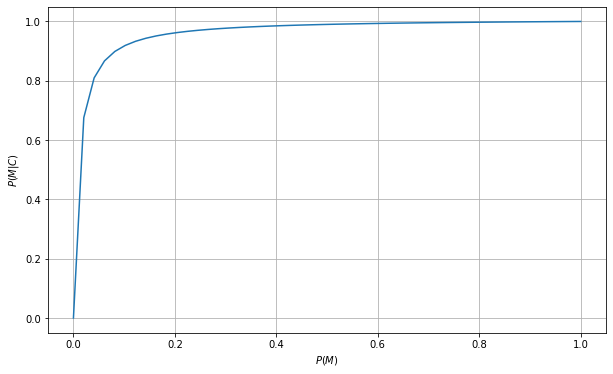

In [2]:
def guilty_func(m):
    return m / (0.99 * m + 0.01)
    
m = np.linspace(0, 1, 50)
plt.figure(figsize=(10, 6))
plt.plot(m, guilty_func(m))
plt.xlabel('$P(M)$')
plt.ylabel('$P(M|C)$')
plt.grid();

Немаловажным является и наличие других "запчастей" расследования: показания свидетелей, мотив, другие улики и т.д. Как можно заметить на основе делп О.Дж. Симпсона или такой детали, как образец крови, такие вещи очень сильно влияют на соотношеие вероятносей вины / невиновности.


### 1.3

Распишем проблему в соответствии с терминологией матрицы ошибок

$$ p(ill=pos|test=pos) = \frac{p(test=pos|ill=true) * p(ill=pos)}{p(test=pos)} = \frac{p(TP) * p(ill=pos)}{p(TP) + p(FP)}$$

$$ p(ill=neg|test=neg) = \frac{p(test=neg|ill=neg) * p(ill=neg)}{p(test=neg)} = \frac{p(TN) * p(ill=neg)}{p(TN) + p(FN)}$$

$TP$ - вероятность правдиво положительного результата теста<br>
$TN$ - вероятность правдиво отрицательного результата теста<br>
$FP$ - вероятность ложно положительного результата теста<br>
$FN$ - вероятность ложно отрицательного результата теста<br>
$p(ill=pos)$ - вероятность быть носителем болезни (равна 0.01)<br>
$pos, neg$ - означают положительный / отрицательный результат теста, наличие отсутствие болезни

In [3]:
def cov_test(fp=0.05, fn=0.05, p_covid=0.01, test_positive=True):
    if test_positive:
        return p_covid * (1 - fn) / (fp * (1 - p_covid) + (1 - fn) * p_covid)
    else:
        return p_covid * fn / ((1 - fp) * (1 - p_covid) + fn * p_covid)
    
cov_test()

0.16101694915254236

Зададим пространство возможных значений fp и fn

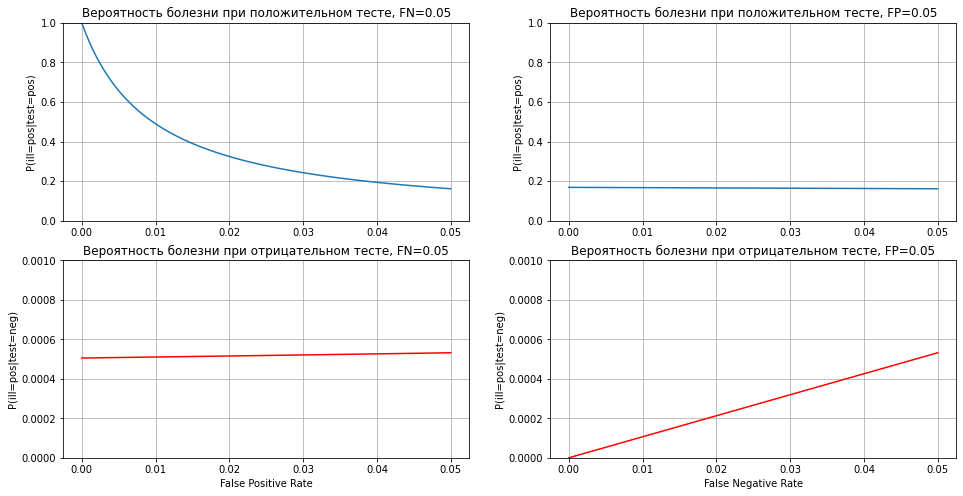

In [5]:
fp_set = np.linspace(0, 0.05, 100)
fn_set = np.linspace(0, 0.05, 100)

y_lim_pos_test = (0, 1)
y_lim_neg_test = (0, 0.001)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))

ax1.plot(fp_set, cov_test(fp=fp_set, test_positive=True))
ax1.set_ylim(y_lim_pos_test)        
ax1.set_title("Вероятность болезни при положительном тесте, FN=0.05")
ax1.set_ylabel("P(ill=pos|test=pos)")
ax1.grid()

ax2.plot(fn_set, cov_test(fn=fn_set, test_positive=True))
ax2.set_ylim(y_lim_pos_test)                                             
ax2.set_title("Вероятность болезни при положительном тесте, FP=0.05")
ax2.set_ylabel("P(ill=pos|test=pos)")
ax2.grid()

ax3.plot(fp_set, cov_test(fp=fp_set, test_positive=False), color="red")
ax3.set_ylim(y_lim_neg_test)
ax3.set_title("Вероятность болезни при отрицательном тесте, FN=0.05")
ax3.set_xlabel("False Positive Rate")
ax3.set_ylabel("P(ill=pos|test=neg)")
ax3.grid()


ax4.plot(fn_set, cov_test(fn=fn_set, test_positive=False), color="red")
ax4.set_ylim(y_lim_neg_test)
ax4.set_title("Вероятность болезни при отрицательном тесте, FP=0.05")
ax4.set_xlabel("False Negative Rate")
ax4.set_ylabel("P(ill=pos|test=neg)")
ax4.grid();

Для того, чтобы сделать вывод о том, какое из решений целесообразно принять в плане работы над характеристиками теста, надо прикинуть, что реально достижимо, а что - нет. Если возможно добиться полного исключения одной из false величин - то к этому и нужно стремиться. Тем не менее, в реальной жизни, если этого все еще не сделано, то скорее всего сделано и не будет. Поэтому можно сконцентрироваться на том, что принечет больший эффект.<br>
Оценим этот вклад. Рассчитаем сначала коэффициенты изменения числа диагнозов при исключении половины ложных срабатываний одного и другого рода, а также базовый уровень:

In [8]:
coef_fp_pos = cov_test(fp=0.02, fn=0.05, test_positive=True)
coef_fp_neg = cov_test(fp=0.02, fn=0.05, test_positive=False)

coef_fn_pos = cov_test(fp=0.05, fn=0.02, test_positive=True)
coef_fn_neg = cov_test(fp=0.05, fn=0.02, test_positive=False)

coef_pos = cov_test(test_positive=True)
coef_neg = cov_test(test_positive=False)

Рассчитаем относительный вклад исправления false случаев как отношение сумму отношений коэффициентов

In [9]:
print("False positive: ", coef_fp_pos / coef_pos + coef_fp_neg / coef_neg)
print("False negative: ", coef_fn_pos / coef_pos + coef_fn_neg / coef_neg)

False positive:  2.983055400363764
False negative:  1.426487731438537


Также рассчитаем эффект исправления через количество человек получающих верный диагноз для выборки в 100 000 человек:

In [12]:
n = 100000
rate = 0.025

fp_effect = (cov_test(fp=rate, test_positive=True) - cov_test(test_positive=True)) * n
fn_effect = (cov_test(test_positive=False) - cov_test(fn=rate, test_positive=False)) * n
print("Результат борьбы с:")
print("False positive:", int(fp_effect), " из ", n)
print("False negative:", int(fn_effect), " из ", n)


Результат борьбы с:
False positive: 11635  из  100000
False negative: 26  из  100000


Результаты свидетельствуют о том, что лучше сосредоточить усилия на том, что уменьшает число ложных диагнозов, то есть на исправлении ошибок "False positive"

# Задание 2 #

Добавим необходимые библиотеки

In [13]:
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal

Скачаем данные и в столбце "new_cases" заменим все нули на единицы.

In [14]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
df.new_cases.replace(0, 1, inplace=True)
df.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
53589,RWA,Africa,Rwanda,2021-01-14,10316.0,194.0,155.857,133.0,5.0,2.857,...,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,NaN,69.02,0.543
55464,STP,Africa,Sao Tome and Principe,2021-02-24,1672.0,17.0,19.571,27.0,1.0,1.000,...,3052.714,32.3,270.113,2.42,NaN,NaN,41.340,2.90,70.39,0.625
26823,GIN,Africa,Guinea,2020-03-24,4.0,1.0,0.429,NaN,NaN,0.000,...,1998.926,35.3,336.717,2.42,NaN,NaN,17.450,0.30,61.60,0.477
13558,CHL,South America,Chile,2021-02-11,764307.0,3731.0,3438.571,19262.0,157.0,75.857,...,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851
42124,MDA,Europe,Moldova,2020-08-21,32484.0,547.0,428.714,929.0,8.0,6.429,...,5189.972,0.2,408.502,5.72,5.9,44.6,86.979,5.80,71.90,0.750


Отфильтруем ту часть, которая относится к состоянию дел в России с 3 марта 2020.

In [15]:
df_rus = df[(df.location == "Russia") & (df.date >= "2020-03-03")]
df_rus.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
53044,RUS,Europe,Russia,2020-07-03,666941.0,6710.0,6715.000,9844.0,176.0,153.429,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52977,RUS,Europe,Russia,2020-04-27,87147.0,6198.0,5718.000,794.0,47.0,55.571,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52974,RUS,Europe,Russia,2020-04-24,68622.0,5849.0,5230.571,615.0,60.0,48.857,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
53161,RUS,Europe,Russia,2020-10-28,1553028.0,15886.0,16401.286,26752.0,343.0,280.857,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
53087,RUS,Europe,Russia,2020-08-15,915808.0,5030.0,5035.000,15585.0,118.0,108.286,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
53038,RUS,Europe,Russia,2020-06-27,626779.0,6843.0,7231.000,8958.0,188.0,138.000,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
53195,RUS,Europe,Russia,2020-12-01,2302062.0,26126.0,25889.429,40050.0,559.0,482.143,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
53207,RUS,Europe,Russia,2020-12-13,2629699.0,27651.0,27219.429,46404.0,481.0,532.714,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
53258,RUS,Europe,Russia,2021-02-02,3842145.0,16406.0,17988.143,72982.0,526.0,513.000,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
53121,RUS,Europe,Russia,2020-09-18,1086955.0,5803.0,5528.286,19128.0,132.0,117.000,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


Выберем признаки, с которыми будем в дальнейшем работать, а ткаже добавим столбец с логарфимом общего числа зафиксированных случаев

In [16]:
columns = ["date", "total_cases", "new_cases"]
df_rus = df_rus[columns]
df_rus["day"] = np.arange(1, len(df_rus) + 1, dtype = int)
df_rus["total_cases_log"] = np.log(df.total_cases)
df_rus.head()

,date,total_cases,new_cases,day,total_cases_log
52922,2020-03-03,3.0,1.0,1,1.098612
52923,2020-03-04,3.0,1.0,2,1.098612
52924,2020-03-05,4.0,1.0,3,1.386294
52925,2020-03-06,13.0,9.0,4,2.564949
52926,2020-03-07,13.0,1.0,5,2.564949


Разделим данные по обусловленному заданием признаку на тренировочную и тестовую части.

In [17]:
TRAIN_SIZE = 50
df_train, df_test = df_rus[:TRAIN_SIZE], df_rus[TRAIN_SIZE:]
df_train.shape, df_test.shape

((50, 5), (311, 5))

Построим графики целевых переменных

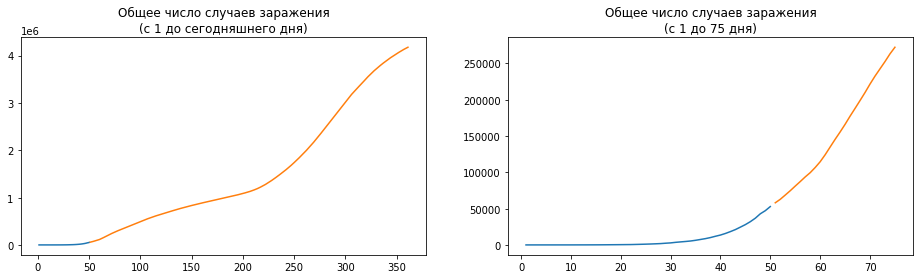

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].margins(0.05)
ax[0].plot(df_train.day, df_train.total_cases, label="Данные обучающей выборки")
ax[0].plot(df_test.day, df_test.total_cases, label="Данные тестовой выборки")
ax[0].set_title("Общее число случаев заражения\n(с 1 до сегодняшнего дня)")

ax[1].margins(0.05)
ax[1].plot(df_train.day, df_train.total_cases, label="Данные обучающей выборки")
ax[1].plot(df_test.day[:25], df_test.total_cases[:25], label="Данные тестовой выборки")
ax[1].set_title("Общее число случаев заражения\n(с 1 до 75 дня)")

plt.show();

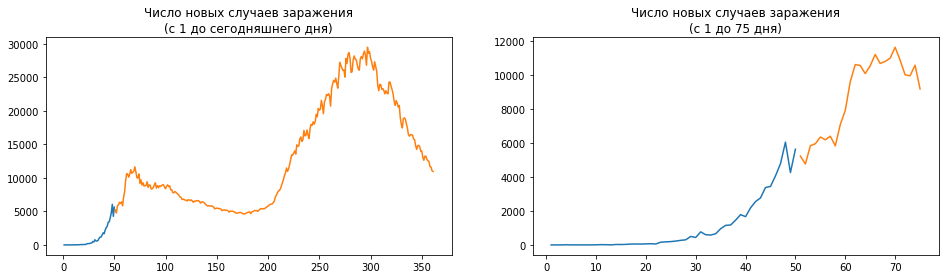

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].margins(0.05)
ax[0].plot(df_train.day, df_train.new_cases, label="Данные обучающей выборки")
ax[0].plot(df_test.day, df_test.new_cases, label="Данные тестовой выборки")
ax[0].set_title("Число новых случаев заражения\n(с 1 до сегодняшнего дня)")

ax[1].margins(0.05)
ax[1].plot(df_train.day, df_train.new_cases, label="Данные обучающей выборки")
ax[1].plot(df_test.day[:25], df_test.new_cases[:25], label="Данные тестовой выборки")
ax[1].set_title("Число новых случаев заражения\n(с 1 до 75 дня)")

plt.show();

Выделим из наших данных X_train, X_test, y_train, y_test.

In [20]:
X_train = df_train.day.values
X_test = df_test.day.values

In [21]:
y_train_new_cases = np.array(df_train.new_cases)
y_test_new_cases = np.array(df_test.new_cases)
y_train_total_cases = np.array(df_train.total_cases)
y_test_total_cases = np.array(df_test.total_cases)
y_train_log_total_cases = np.array(df_train.total_cases_log)
y_test_log_total_cases = np.array(df_test.total_cases_log)

### 2.a Построим модель линейной регрессии на основании столбца "total_cases_log"

Построим модель линейной регрессии

In [23]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train_log_total_cases)
alpha = model.coef_[0]
beta = model.intercept_
print(f"Alpha = {alpha}, Beta = {beta}")

Alpha = 0.19829091233588567, Beta = 1.62244623644881


In [24]:
y_pred = model.predict(df_rus.day.values.reshape(-1, 1))
df_rus["prediced_log_total_cases"] = np.array(y_pred)

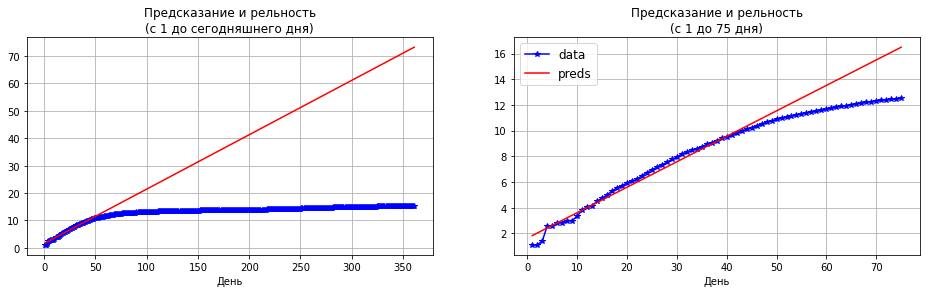

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(df_rus.day,
           df_rus.total_cases_log,
           color='blue',
           marker='*',
           label='data')
ax[0].plot(df_rus.day,
           df_rus.prediced_log_total_cases,
           color='red',
           label='preds')
ax[0].set(xlabel='День', title='')
ax[0].set_title("Предсказание и рельность\n(с 1 до сегодняшнего дня)")
ax[0].grid()

ax[1].plot(df_rus[:75].day,
           df_rus[:75].total_cases_log,
           color='blue',
           marker='*',
           label='data')
ax[1].plot(df_rus[:75].day,
           df_rus[:75].prediced_log_total_cases,
           color='red',
           label='preds')
ax[1].set(xlabel='День', title='')
ax[1].set_title("Предсказание и рельность\n(с 1 до 75 дня)")
ax[1].grid()

plt.legend(fontsize='large')
plt.show();

Переведем данные от логарифмической шкалы к обычному виду

In [26]:
y_pred_exp = np.exp(y_pred)
df_rus["prediced_total_cases"] = np.array(y_pred_exp)

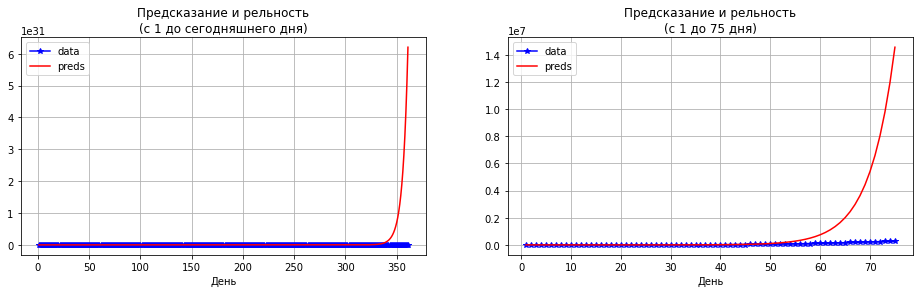

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(df_rus.day,
           df_rus.total_cases,
           color="blue",
           marker="*",
           label="data")
ax[0].plot(df_rus.day,
           df_rus.prediced_total_cases,
           color="red",
           label="preds")
ax[0].set(xlabel="День", title="Предсказание и рельность\n(с 1 до сегодняшнего дня)")
ax[0].grid()
ax[0].legend()

ax[1].plot(df_rus[:75].day,
           df_rus[:75].total_cases,
           color="blue",
           marker="*",
           label="data")
ax[1].plot(df_rus[:75].day,
           df_rus[:75].prediced_total_cases,
           color="red",
           label="preds")
ax[1].set(xlabel="День", title="Предсказание и рельность\n(с 1 до 75 дня)")
ax[1].grid()
ax[1].legend()

plt.show();

Повторим тот же эксперимент для самописной модели регрессии. Для этого создадим класс модели линейной регрессии

In [28]:
class RegMod():
    
    def __init__(self, mu: np.ndarray, sigma: np.ndarray):
        self.init_mu = mu
        self.init_sigma = sigma
        
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        X = np.hstack((np.ones((len(X), 1)), X))
        # Calculate Moore-Penrose pseudoinverse matix
        moore_penrose_p_i = np.linalg.inv(X.T @ X) @ X.T
        # Calculate the weights...
        w = moore_penrose_p_i @ y
        y_pred = X @ w
        # ... and find the variance
        noise_var = (y - y_pred).var()
        alpha = 1 / noise_var
        # Update distribution parameters
        self.sigma = np.linalg.inv(np.linalg.inv(self.init_sigma) + X.T @ X / noise_var)
        self.mu = self.sigma @ (np.linalg.inv(self.init_sigma) @ self.init_mu + X.T @ y / noise_var)
        
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        X = np.hstack((np.ones((len(X), 1)), X))
        return X @ self.mu
    
    
    def predict_samples(self, X: np.ndarray, n_samples: int) -> np.ndarray:
        X = np.hstack((np.ones((len(X), 1)), X))
        Ws = np.random.multivariate_normal(self.mu, self.sigma, n_samples)
        res = np.zeros((len(Ws), len(X)))
        for i, w in enumerate(Ws):
            res[i] = X @ w  
        return res

Создадим модель линейной регрессии на основе нашего класса, обучим ее и визуализируем полученный результат

In [29]:
model = RegMod(mu = np.zeros(2), sigma = 20 * np.eye(2))
model.fit(X_train.reshape(-1, 1), np.log(y_train_total_cases))

y_pred_vis_s = model.predict(df_rus.day.values.reshape(-1, 1))

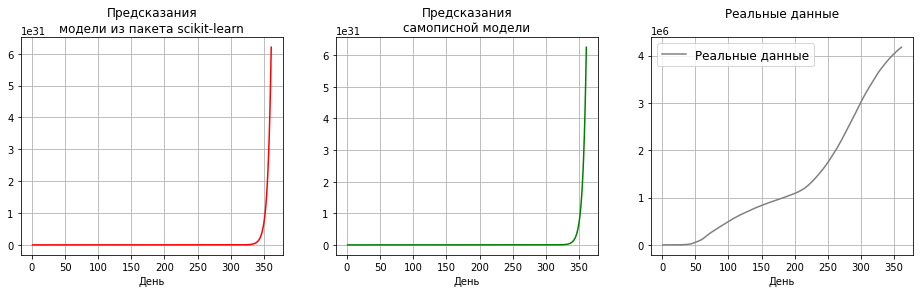

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].plot(df_rus.day,
           df_rus.prediced_total_cases,
           color="red",
           label="Модель из пакета scikit-learn")
ax[0].set(xlabel="День", title="Предсказания\nмодели из пакета scikit-learn")
ax[0].grid()

ax[1].plot(df_rus.day,
           np.exp(y_pred_vis_s),
           color="green",
           label="Предсказания самописной модели")
ax[1].set(xlabel="День", title="Предсказания\nсамописной модели")
ax[1].grid()

ax[2].plot(df_rus.day,
           df_rus.total_cases,
           color="gray",
           label="Реальные данные")
ax[2].set(xlabel="День", title="Реальные данные\n")
ax[2].grid()

plt.legend(fontsize='large')
plt.show()

Результаты работы обеих моделей идентичны (и отличаются от реальных данных).

### 2.b Найдем апостериорное распределение параметров этой модели для достаточно широкого априорного распределения.

Параметры модели: [1.62163475 0.19831499]


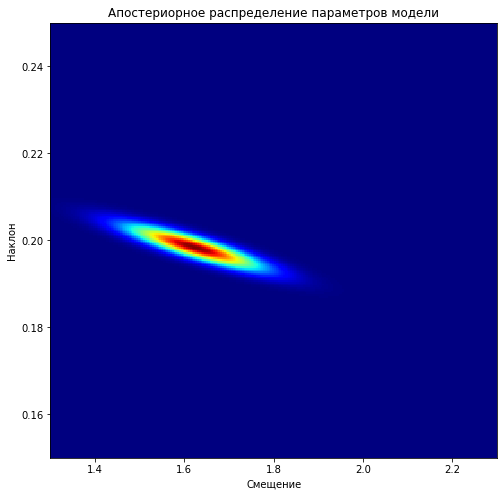

In [31]:
N = 250

plot_lims = (
    (1.3, 2.3),
    (0.15, 0.25)
)

X = np.linspace(*plot_lims[0], N)
Y = np.linspace(*plot_lims[1], N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

print(f"Параметры модели: {model.mu}") 

Z = multivariate_normal.pdf(pos, mean=model.mu, cov=model.sigma)

plt.figure(figsize=(8, 8))
plt.xlim(plot_lims[0])
plt.ylim(plot_lims[1])
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
plt.title("Апостериорное распределение параметров модели")
plt.xlabel("Смещение")
plt.ylabel("Наклон")
plt.show();

### 2.c Проведем сэмплирование

In [32]:
date_start = pd.to_datetime("2020-03-03")
date_may = pd.to_datetime("2020-05-01")
date_june = pd.to_datetime("2020-06-01")
date_sept = pd.to_datetime("2020-09-01")

X_may = np.array([[(date_may - date_start).days]])
X_june = np.array([[(date_june - date_start).days]])
X_sept = np.array([[(date_sept - date_start).days]])

y_may_total = int(np.exp(model.predict(X_may)))
y_june_total = int(np.exp(model.predict(X_june)))
y_sept_total = int(np.exp(model.predict(X_sept)))

print(f"К 1 мая: {y_may_total} случаев")
print(f"К 1 июня: {y_june_total} случаев")
print(f"К 1 сентября: {y_sept_total} случаев")

К 1 мая: 610613 случаев
К 1 июня: 285565977 случаев
К 1 сентября: 23955217418345968 случаев


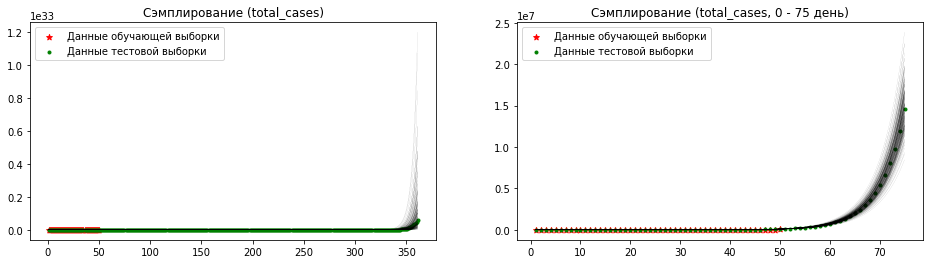

In [34]:
X_sample = np.hstack((X_train, X_test))
y_samples = np.exp(model.predict_samples(X_sample.reshape(-1, 1), 200))

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

for y_sample in y_samples:
    ax[0].plot(X_sample, y_sample, "k-", lw=0.05)
    ax[1].plot(X_sample[:75], y_sample[:75], "k-", lw=0.05)
    
ax[0].scatter(X_train,
              y_train_total_cases,
              label="Данные обучающей выборки",
              marker="*", color="red")
ax[0].scatter(df_rus.day,
              df_rus.prediced_total_cases.values,
              label="Данные тестовой выборки",
              marker=".",
              color="green")
ax[0].set_title('Сэмплирование (total_cases)')
ax[0].legend()
    
ax[1].scatter(X_train,
              y_train_total_cases,
              label="Данные обучающей выборки",
              marker="*",
              color="red")
ax[1].scatter(df_rus.day[:75],
              df_rus.prediced_total_cases.values[:75],
              label="Данные тестовой выборки",
              marker=".",
              color="green")
ax[1].set_title("Сэмплирование (total_cases, 0 - 75 день)")
ax[1].legend()

plt.show()

Как можно увидеть, прогнозируемое поведение графика предсказанного числа зараженных сильно отличается от реальности (чему в данном случае остается лишь порадоваться.

# Задание 3

### 3.a Будем использовать для предсказания другую модель, основанную на предложенной в работе (Murray, 2020)

Целевая функция остается y_train_log_total_cases, а X_train - все также остается вводом. Уравнение, описывающее зависимость между параметрами модели, при логарифмировании примет вид квадратного уравнения с неизвестными постоянными коэффициентами. Таким образом мы перейдем к следующему:

In [35]:
X_train_new = np.array([np.square(X_train), X_train]).reshape(2, -1).T
X_test_new = np.array([np.square(X_test), X_test]).reshape(2, -1).T

In [36]:
model_sigm = LinearRegression()

In [37]:
model_sigm.fit(X_train_new, y_train_log_total_cases)

LinearRegression()

In [38]:
y_pred_new = model_sigm.predict(np.array([np.square(df_rus.day.values),
                                          df_rus.day.values]).reshape(2, -1).T)
y_pred_new = np.exp(y_pred_new)
y_pred_new_total = y_pred_new.cumsum()

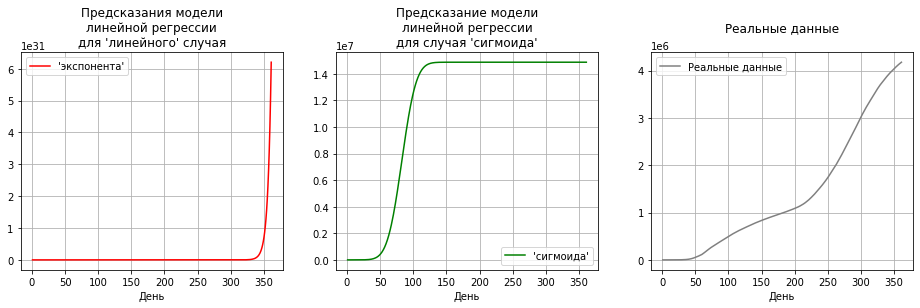

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].plot(df_rus.day,
           df_rus.prediced_total_cases,
           color="red",
           label="'экспонента'")
ax[0].set(xlabel="День", title="Предсказания модели\nлинейной регрессии\nдля 'линейного' случая")
ax[0].grid()
ax[0].legend()

ax[1].plot(df_rus.day,
           y_pred_new_total,
           color="green",
           label="'сигмоида'")
ax[1].set(xlabel="День", title="Предсказание модели\nлинейной регрессии\nдля случая 'сигмоида'")
ax[1].grid()
ax[1].legend()

ax[2].plot(df_rus.day,
           df_rus.total_cases,
           color="gray",
           label="Реальные данные")
ax[2].set(xlabel="День", title="Реальные данные\n")
ax[2].grid()
ax[2].legend()

plt.show()

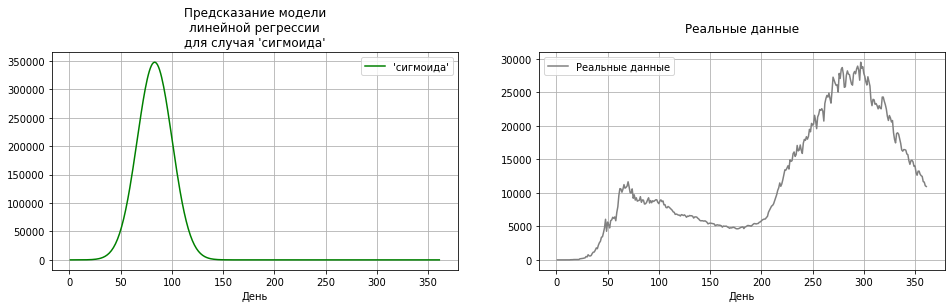

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(df_rus.day,
           y_pred_new,
           color="green",
           label="'сигмоида'")
ax[0].set(xlabel="День", title="Предсказание модели\nлинейной регрессии\nдля случая 'сигмоида'")
ax[0].grid()
ax[0].legend()

ax[1].plot(df_rus.day,
           df_rus.new_cases,
           color="gray",
           label="Реальные данные")
ax[1].set(xlabel="День", title="Реальные данные\n")
ax[1].grid()
ax[1].legend()

plt.show()

Соберем воедино

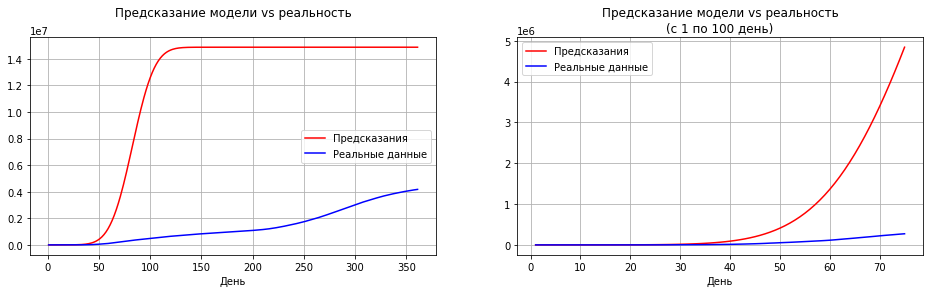

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(df_rus.day,
           y_pred_new_total,
           color="red",
           label="Предсказания")
ax[0].plot(df_rus.day,
           df_rus.total_cases,
           color="blue",
           label="Реальные данные")
ax[0].set(xlabel="День", title="Предсказание модели vs реальность\n")
ax[0].grid()
ax[0].legend()

ax[1].plot(df_rus[:75].day,
           y_pred_new_total[:75],
           color="red",
           label="Предсказания")
ax[1].plot(df_rus.day[:75],
           df_rus.total_cases[:75],
           color="blue",
           label="Реальные данные")
ax[1].set(xlabel="День", title="Предсказание модели vs реальность\n(с 1 по 100 день)")
ax[1].grid()
ax[1].legend()

plt.show;

### 3.b Повторим поиск признаков новой модели.

In [42]:
alpha1, alpha2, beta = *model_sigm.coef_, model_sigm.intercept_
print("Параметы моедли:\n", alpha1, "\n", alpha2, "\n", beta)

Параметы моедли:
 -0.001717670504179804 
 0.2858921080490556 
 0.8632358736013375


In [43]:
N = 250
xs = np.linspace(0, 60, N)
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
Z = np.linspace(-5, 5, N)

X, Y, Z = np.meshgrid(X, Y, Z)

pos = np.empty(X.shape + (3,))
pos[:, :, :, 0] = X
pos[:, :, :, 1] = Y
pos[:, :, :, 2] = Z

cur_mu, cur_sigma = np.array([beta, alpha1, alpha2]), 2 * np.eye(3)

### 3.c Просэмплируем

In [44]:
def sampling(mu, sigma, n=20, points=None):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1] * xs + w[2] * xs ** 2), "k-", lw=.2)
    plt.ylim((0, 5000))
    plt.xlim((0, 50))
    if not points is None:
        plt.scatter(points[0], points[1], marker="*", s=200)
    plt.show()

    
def bayesian_update(mu, sigma, x, y, sn):
    x_matrix = np.array([[1, x, x**2]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sn ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sn ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

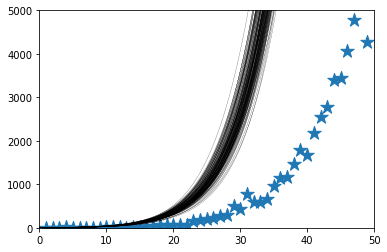

In [45]:
sn = np.std(np.log(y_pred_new_total) - df_rus.total_cases_log)

post_mu, post_sigma = cur_mu, cur_sigma
for i in range(X_train.shape[0]):
    px, py = X_train[i], y_train_log_total_cases[i]
    post_mu, post_sigma = bayesian_update(post_mu, post_sigma, px, py, sn)

sampling(post_mu, post_sigma, 150, points=[df_rus.day, df_rus.new_cases])

post_a, post_b, post_c = post_mu

In [46]:
xs = np.arange(1, 181, 1)
df_new = pd.DataFrame(xs, columns = ["nday"])
df_new["pred"] = np.exp(post_a * xs + post_b * xs**2 + post_c)
df_new["pred_total"] = df_new.pred.cumsum()

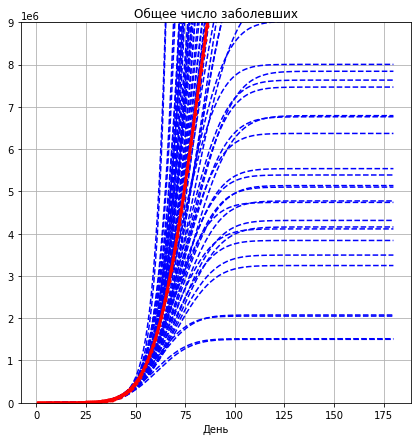

In [47]:
fig, ax = plt.subplots(figsize=(7,7))
plt.ylim(top=9e6)

out = []
for w0_sample, w1_sample, w2_sample in np.random.multivariate_normal(post_mu, post_sigma, 60):
    df_sample = pd.DataFrame(xs, columns = ["nday"])
    df_sample["pred"] = np.exp(w1_sample * xs + w2_sample * xs**2 + w0_sample)
    df_sample["pred_total"] = df_sample.pred.cumsum()
    
    plt.plot(df_sample.nday, df_sample.pred_total.values, color='blue', linestyle='dashed')
    out.append(df_sample.iloc[-1]['pred_total'])

ax.plot(df_sample.nday, y_pred_new_total[df_sample.nday], linewidth=3, c="red", marker=".", alpha=1)
ax.set(xlabel="День", title="Общее число заболевших")
ax.grid()

plt.show();

# 4 Рассмотрим модели линейной регрессии, примененные к другим странам

Выберем ряд стран максимально разными

In [48]:
countries = ["Japan", "China", "Singapore", "Malaysia", "Vietnam",
             "Tunisia", "Zimbabwe", "South Africa", "Algeria", "Egypt",
             "Spain", "France", "Italy", "Greece", "Germany",
             "Australia", "Canada", "United States", "Cuba", "Bahamas",
             "Brazil", "Argentina", "Mexico", "Panama", "Peru"]

columns = ["location", "date", "total_cases", "new_cases"]
df_w = df[columns]
df_w.total_cases.replace(np.NaN, 1, inplace=True)
df_w.new_cases.replace(np.NaN, 1, inplace=True)
df_w["total_cases_log"] = np.log(df_w.total_cases, dtype=np.float32)
df_w.sample(10)

,location,date,total_cases,new_cases,total_cases_log
15049,Costa Rica,2020-05-08,773.0,8.0,6.650279
56081,Senegal,2020-11-06,15676.0,8.0,9.659886
24904,Germany,2020-02-03,12.0,2.0,2.484907
42986,Mongolia,2021-01-12,1469.0,13.0,7.292337
22204,Europe,2021-02-24,33732579.0,171962.0,17.333975
28117,Haiti,2020-12-08,9399.0,29.0,9.148358
21288,Eswatini,2020-09-13,5075.0,25.0,8.532082
7540,Benin,2020-08-13,2014.0,1.0,7.607878
24622,Georgia,2020-05-28,738.0,3.0,6.603944
26328,Grenada,2020-12-12,43.0,1.0,3.761200


In [49]:
model_lr = LinearRegression()
parameters = []

In [51]:
for country in countries:
    print(f'Страна: {country}')
    df_w_p = df_w[(df_w.location == country) & (df_w.total_cases >= 2)]
    df_w_p["day"] = np.arange(1, len(df_w_p) + 1, dtype = int)
        
    X_train_p = df_w_p.day[:TRAIN_SIZE].values
    X_test_p = df_w_p.day.values

    X_train_p_new = np.array([X_train_p, np.square(X_train_p)], dtype=int).T
    X_test_p_new = np.array([X_test_p, np.square(X_test_p)], dtype=int).T
    
        
    y_train_p_new = np.array(df_w_p[:TRAIN_SIZE].total_cases_log, dtype=np.float32)
    
    model_lr.fit(X_train_p_new, y_train_p_new)
    
    pred_p_new = np.exp(model_lr.predict(X_test_p_new), dtype=np.float32)
    pred_p_new_total = pred_p_new.cumsum()
    parameters.append((country, *model_lr.coef_))

Страна: Japan
Страна: China
Страна: Singapore
Страна: Malaysia
Страна: Vietnam
Страна: Tunisia
Страна: Zimbabwe
Страна: South Africa
Страна: Algeria
Страна: Egypt
Страна: Spain
Страна: France
Страна: Italy
Страна: Greece
Страна: Germany
Страна: Australia
Страна: Canada
Страна: United States
Страна: Cuba
Страна: Bahamas
Страна: Brazil
Страна: Argentina
Страна: Mexico
Страна: Panama
Страна: Peru


И попробуем кластеризовать данные для этих стран

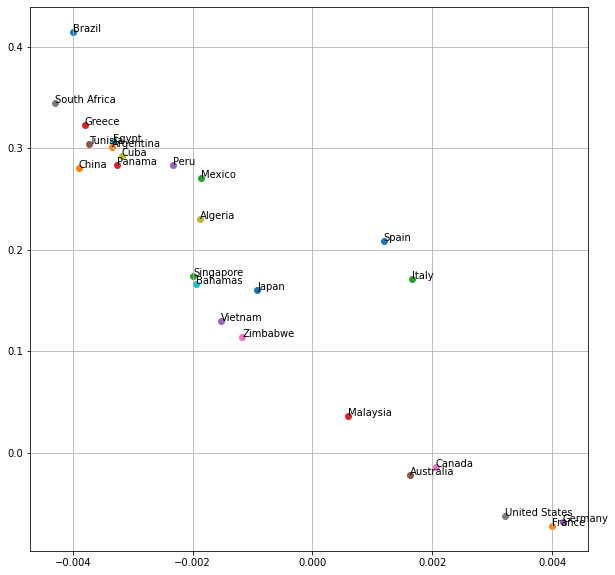

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
for entry in parameters:
    x, y = entry[2], entry[1]
    ax.scatter(x, y)
    ax.annotate(entry[0], (x, y))
ax.grid()

Построим графики для стран, лежащих "в разных углах", например, Бразилии и Японии

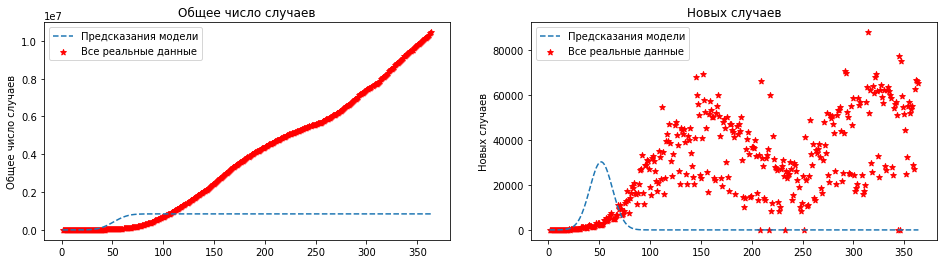

In [53]:
df_brazil = df_w[(df_w.location == "Brazil") & (df_w.total_cases >= 2)]
df_brazil["day"] = np.arange(1, len(df_brazil) + 1, dtype = int)
        
X_train_p = df_brazil.day[:TRAIN_SIZE].values
X_test_p = df_brazil.day.values

X_train_p_new = np.array([X_train_p, np.square(X_train_p)], dtype=int).T
X_test_p_new = np.array([X_test_p, np.square(X_test_p)], dtype=int).T
    
y_train_p_new = np.array(df_brazil[:TRAIN_SIZE].total_cases_log, dtype=np.float32)
    
model_lr.fit(X_train_p_new, y_train_p_new)
    
pred_p_new = np.exp(model_lr.predict(X_test_p_new), dtype=np.float32)
pred_p_new_total = pred_p_new.cumsum()

fig, axis = plt.subplots(1, 2, figsize=(16, 4))

axis[0].plot(X_test_p, pred_p_new_total, label=f"Предсказания модели", linestyle="--")
axis[0].scatter(X_test_p, df_brazil.total_cases, label=f"Все реальные данные", marker="*", color="red")
axis[0].set_ylabel("Общее число случаев")
axis[0].set_title("Общее число случаев")
axis[0].legend()

axis[1].plot(X_test_p, pred_p_new, label=f"Предсказания модели", linestyle="--")
axis[1].scatter(X_test_p, df_brazil.new_cases, label=f"Все реальные данные", marker="*", color="red")
axis[1].set_ylabel("Новых случаев")
axis[1].set_title("Новых случаев")
axis[1].legend();

plt.show();


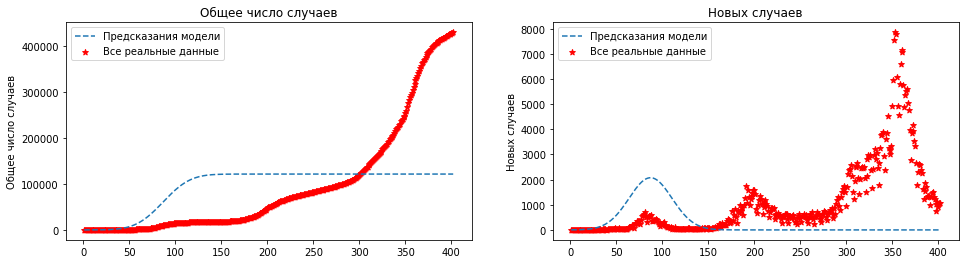

In [55]:
df_japan = df_w[(df_w.location == "Japan") & (df_w.total_cases >= 2)]
df_japan["day"] = np.arange(1, len(df_japan) + 1, dtype = int)
        
X_train_p = df_japan.day[:TRAIN_SIZE].values
X_test_p = df_japan.day.values

X_train_p_new = np.array([X_train_p, np.square(X_train_p)], dtype=int).T
X_test_p_new = np.array([X_test_p, np.square(X_test_p)], dtype=int).T
    
y_train_p_new = np.array(df_japan[:TRAIN_SIZE].total_cases_log, dtype=np.float32)
    
model_lr.fit(X_train_p_new, y_train_p_new)
    
pred_p_new = np.exp(model_lr.predict(X_test_p_new), dtype=np.float32)
pred_p_new_total = pred_p_new.cumsum()

fig, axis = plt.subplots(1, 2, figsize=(16, 4))

axis[0].plot(X_test_p, pred_p_new_total, label=f"Предсказания модели", linestyle="--")
axis[0].scatter(X_test_p, df_japan.total_cases, label=f"Все реальные данные", marker="*", color="red")
axis[0].set_ylabel("Общее число случаев")
axis[0].set_title("Общее число случаев")
axis[0].legend()

axis[1].plot(X_test_p, pred_p_new, label=f"Предсказания модели", linestyle="--")
axis[1].scatter(X_test_p, df_japan.new_cases, label=f"Все реальные данные", marker="*", color="red")
axis[1].set_ylabel("Новых случаев")
axis[1].set_title("Новых случаев")
axis[1].legend();

plt.show();
